# University of San Diego - MSADS 500B Final Project UE Wang

In [1]:
# Import the needed pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from pylab import xticks
import seaborn as sns
import statistics
import warnings
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
# Read the dataset
house_raw = pd.read_csv("/Users/UE/Desktop/house_sales.csv")
house_raw.info()
house_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Count the missing values
house_raw.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Before doing any data wrangling, start with descriptive statistics.
house_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### From the above information, we can know that there are 4 variables that contain missing values.
#### First, let's see how the 4 variables are distributed.

<AxesSubplot:xlabel='sqft_lot'>

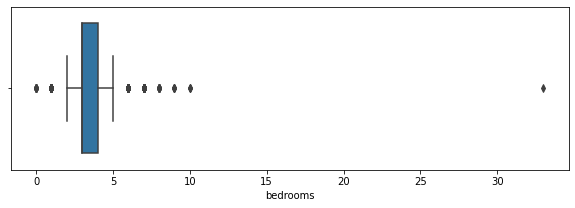

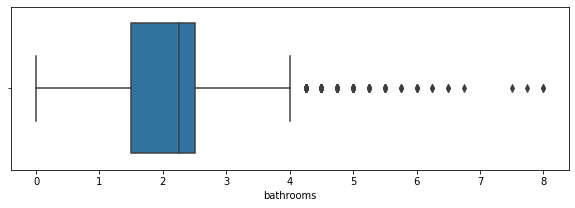

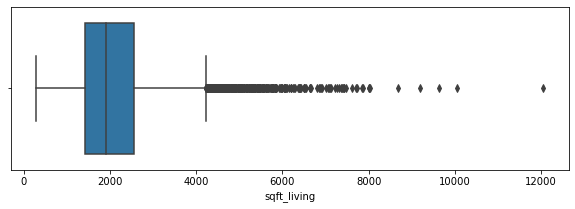

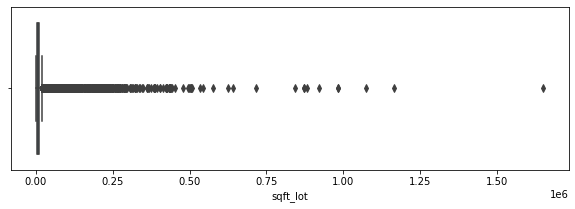

In [6]:
fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.bedrooms)

fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.bathrooms)

fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.sqft_living)

fig,ax = plt.subplots(figsize = (10,3))
sns.boxplot(house_raw.sqft_lot)

#### All four variables are right-skewed. Outliers' data points will have a significant impact on the mean.

In [7]:
# Fill in the missing values with the median.
house_raw['bedrooms'] = house_raw['bedrooms'].fillna(house_raw['bedrooms'].median())
house_raw['bathrooms'] = house_raw['bathrooms'].fillna(house_raw['bathrooms'].median())
house_raw['sqft_living'] = house_raw['sqft_living'].fillna(house_raw['sqft_living'].median()) 
house_raw['sqft_lot'] = house_raw['sqft_lot'].fillna(house_raw['sqft_lot'].median())

In [8]:
# All the missing values have been replaced.
house_raw.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Replacing the bedroom outlier:
house_raw['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,10420
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [10]:
house_raw['bedrooms'] = house_raw['bedrooms'].replace(33.0, 3.0, regex=True)
house_raw['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,10421
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


#### View = 1 means the house has a view and view = 0 means the house doesn't have a view.
#### Based on the variable description, view = 2,3,4 is a wrong data entry.
#### We will use 1 to replace the wrong data entry.

In [11]:
house_raw['view'].value_counts().to_frame()

,view
0,19489
2,963
3,510
1,332
4,319


In [12]:
house_raw['view'] = house_raw['view'].replace(2.0, 1.0, regex=True)
house_raw['view'] = house_raw['view'].replace(3.0, 1.0, regex=True)
house_raw['view'] = house_raw['view'].replace(4.0, 1.0, regex=True)
house_raw['view'].value_counts().to_frame()

,view
0,19489
1,2124


In [13]:
house_raw.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.005919,0.002101,-0.011529,-0.130281,0.018525,-0.002721,0.011405,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.309783,0.515365,0.681527,0.086530,0.256794,0.266369,0.359120,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.005919,0.309783,1.000000,0.500483,0.563855,0.028207,0.177992,-0.005037,0.082806,0.025030,0.358322,0.479064,0.298110,0.155478,0.020089,-0.154092,-0.010543,0.131066,0.392331,0.025166
bathrooms,0.002101,0.515365,0.500483,1.000000,0.714307,0.083146,0.487859,0.067113,0.170830,-0.123002,0.648745,0.667757,0.276989,0.495315,0.048536,-0.200677,0.026612,0.218557,0.554516,0.086509
sqft_living,-0.011529,0.681527,0.563855,0.714307,1.000000,0.159695,0.345290,0.105203,0.264924,-0.057751,0.744259,0.850785,0.420720,0.310977,0.055857,-0.193794,0.049893,0.232981,0.736945,0.175089
sqft_lot,-0.130281,0.086530,0.028207,0.083146,0.159695,1.000000,-0.005718,0.020783,0.067403,-0.008757,0.109016,0.176831,0.015346,0.050494,0.008588,-0.127739,-0.085286,0.223731,0.142063,0.717635
floors,0.018525,0.256794,0.177992,0.487859,0.345290,-0.005718,1.000000,0.023698,0.017871,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.005037,0.067113,0.105203,0.020783,0.023698,1.000000,0.264057,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011405,0.359120,0.082806,0.170830,0.264924,0.067403,0.017871,0.264057,1.000000,0.047143,0.237327,0.153325,0.275310,-0.062810,0.095029,0.091213,0.009529,-0.088244,0.273444,0.064345
condition,-0.023783,0.036362,0.025030,-0.123002,-0.057751,-0.008757,-0.263768,0.016653,0.047143,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# Part 2: Data Visualization:

### 2.1 Bedroom numbers of the house 

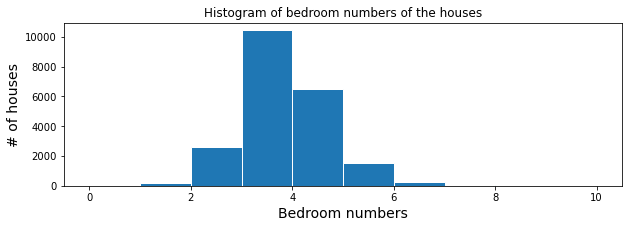

In [14]:
# Using a a histogram to identify the distribution of bedrooms per home
plt.figure(figsize=(10,3))
plt.hist(house_raw['bedrooms'], bins=10, edgecolor = 'white')
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of bedroom numbers of the houses')
plt.show()

In [15]:
house_raw['bedrooms'].describe()

count    21613.000000
mean         3.351872
std          0.887140
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64

#### Thus, we know that a house with 3 rooms is the most popular home type.
#### Next, let's see the bedroom numbers and their prices.

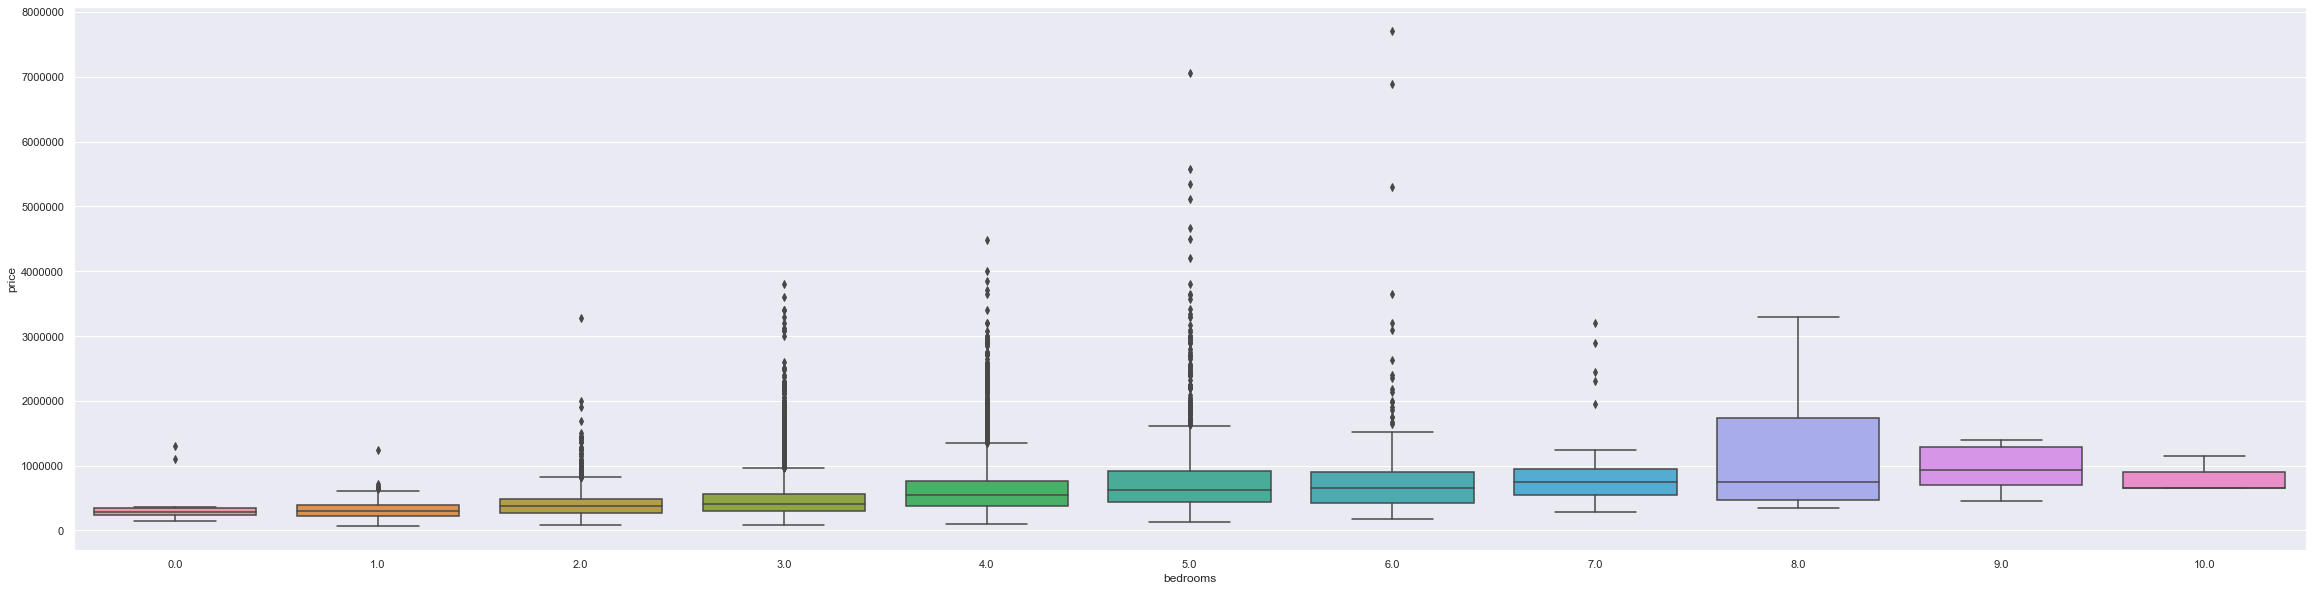

In [59]:
sns.boxplot(x="bedrooms", y="price", data=house_raw)
plt.ticklabel_format(style='plain', axis='y')
sns.set(rc={'figure.figsize':(20,10)})

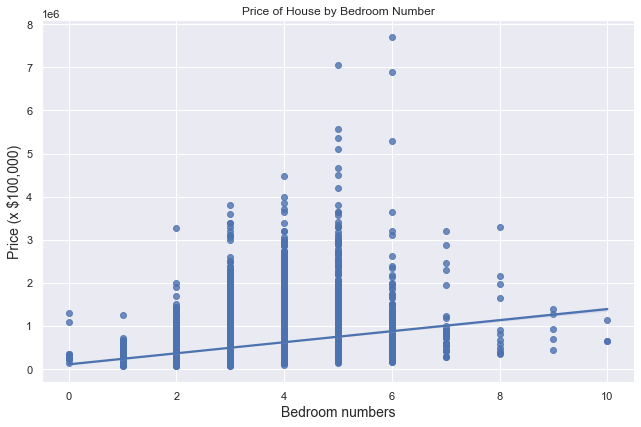

In [17]:
sns.lmplot(x ="bedrooms", y ="price", data = house_raw, height=6, aspect=1.5)
plt.xlabel('Bedroom numbers', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Bedroom Number')
plt.show()

### 2.2 Bathroom numbers

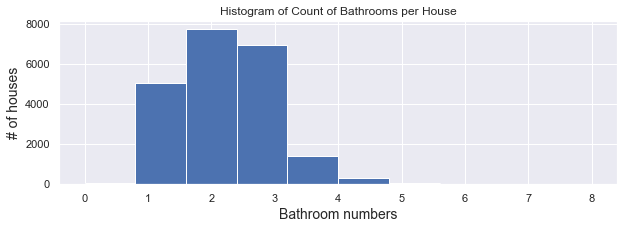

In [18]:
# The most popular house type is identified by using a histogram.
plt.figure(figsize=(10,3))
plt.hist(house_raw['bathrooms'], bins=10, edgecolor='white')
plt.xlabel('Bathroom numbers', fontsize=14)
plt.ylabel('# of houses', fontsize=14)
plt.title('Histogram of Count of Bathrooms per House')
plt.show()

In [19]:
print(house_raw['bathrooms'].describe())
print(house_raw['bathrooms'].mode())

count    21613.000000
mean         2.120252
std          0.750257
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
0    2.5
Name: bathrooms, dtype: float64


#### The bathroom average is 2.12 and the most common is 2.5.

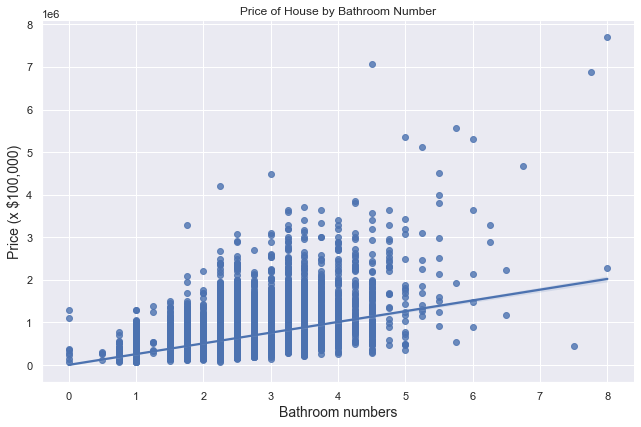

In [20]:
sns.lmplot(x ="bathrooms", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Bathroom numbers', fontsize = 14)
plt.ylabel('Price (x $100,000)', fontsize = 14)
plt.title('Price of House by Bathroom Number')
plt.show()

### 2.3 Living squarefeet of the house:

In [21]:
house_raw['sqft_living'].value_counts().to_frame()

,sqft_living
1920.0,1200
1300.0,132
1400.0,130
1440.0,129
1660.0,125
...,...
1092.0,1
6300.0,1
3847.0,1
1788.0,1


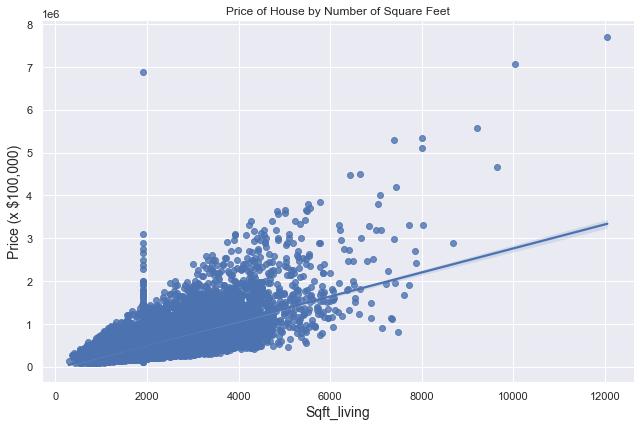

In [22]:
sns.lmplot(x ="sqft_living", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Sqft_living', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Number of Square Feet')
plt.show()

#### From the above graph, we can see that the living sqft is positively related to the house price.

### 2.4 sqft_lot of the house:

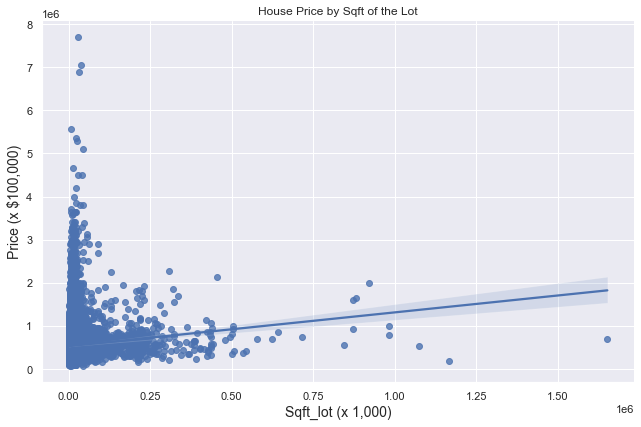

In [23]:
sns.lmplot(x ='sqft_lot', y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Sqft_lot (x 1,000)', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('House Price by Sqft of the Lot')
plt.show()

### 2.5 Floor number and the house  price:

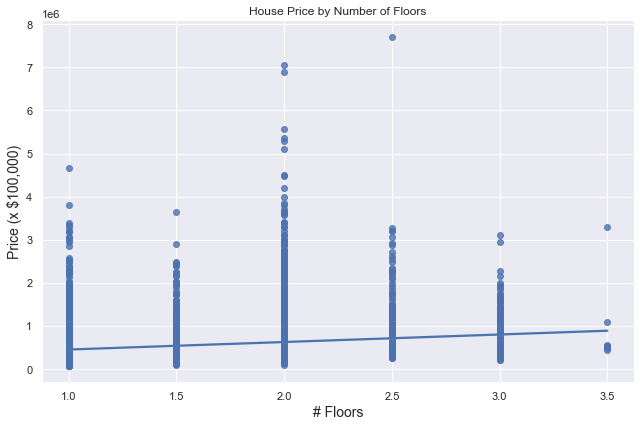

In [24]:
sns.lmplot(x ="floors", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('# Floors', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('House Price by Number of Floors')
plt.show()

### 2.6 Water front:

#### 1 means the house has a waterfront. 0 means the house doesn't have a waterfront.

In [25]:
house_raw['waterfront'].value_counts().to_frame()

,waterfront
0,21450
1,163


In [65]:
# Let's start by making two new tables, one with and one without a view of the water.
with_waterfront = house_raw[house_raw['waterfront'] == 1]
no_waterfront = house_raw[house_raw['waterfront'] == 0]
with_waterfront_price_median = with_waterfront['price'].median()
print("Houses with waterfront median price is ",with_waterfront_price_median,"$")
no_waterfront_price_median = no_waterfront['price'].mean()
print("Houses that has no waterfront median price is", no_waterfront_price_median,"$")

Houses with waterfront median price is  1400000.0 $
Houses that has no waterfront median price is 531563.5998135199 $


In [66]:
# Crate a dataframe:
data_waterfront = [with_waterfront_price_median, 'With Waterfront'],[no_waterfront_price_median, 'No Waterfront']
# Create the pandas DataFrame
waterfront = pd.DataFrame(data_waterfront, columns=['Median_Price', 'Waterfront'])
# print dataframe.
waterfront

,Median_Price,Waterfront
0,1.400000e+06,With Waterfront
1,5.315636e+05,No Waterfront


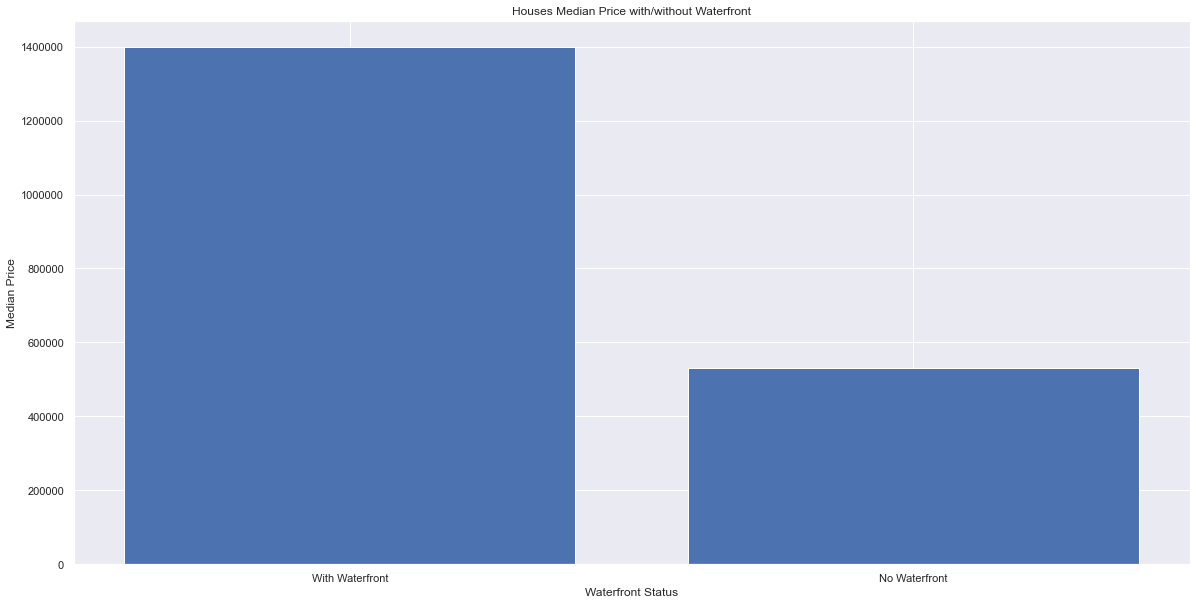

In [67]:
plt.xlabel("Waterfront Status")
plt.ylabel("Median Price")
plt.bar(waterfront['Waterfront'], waterfront['Median_Price'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Houses Median Price with/without Waterfront")
plt.show()

### 2.7 View of the house

#### Based on the description, the view is 0. This means the house has no view. View is 1. This means the house has a view.

In [29]:
with_view = house_raw[house_raw['view'] == 1]
no_view = house_raw[house_raw['view'] == 0]
with_view_price_median = with_view['price'].median()
print("Houses with view median price is ", with_view_price_median,"$")
no_view_price_median = no_view['price'].mean()
print("Houses that has no view median price is", no_view_price_median,"$")

Houses with view median price is  750000.0 $
Houses that has no view median price is 496564.19210836885 $


In [63]:
# Crate a dataframe:
data_view = [with_view_price_median, 'With View'],[no_view_price_median, 'No View']
# Create the pandas DataFrame
view = pd.DataFrame(data_view, columns = ['Median_Price', 'View'])
# print dataframe.
view

,Median_Price,View
0,750000.000000,With View
1,496564.192108,No View


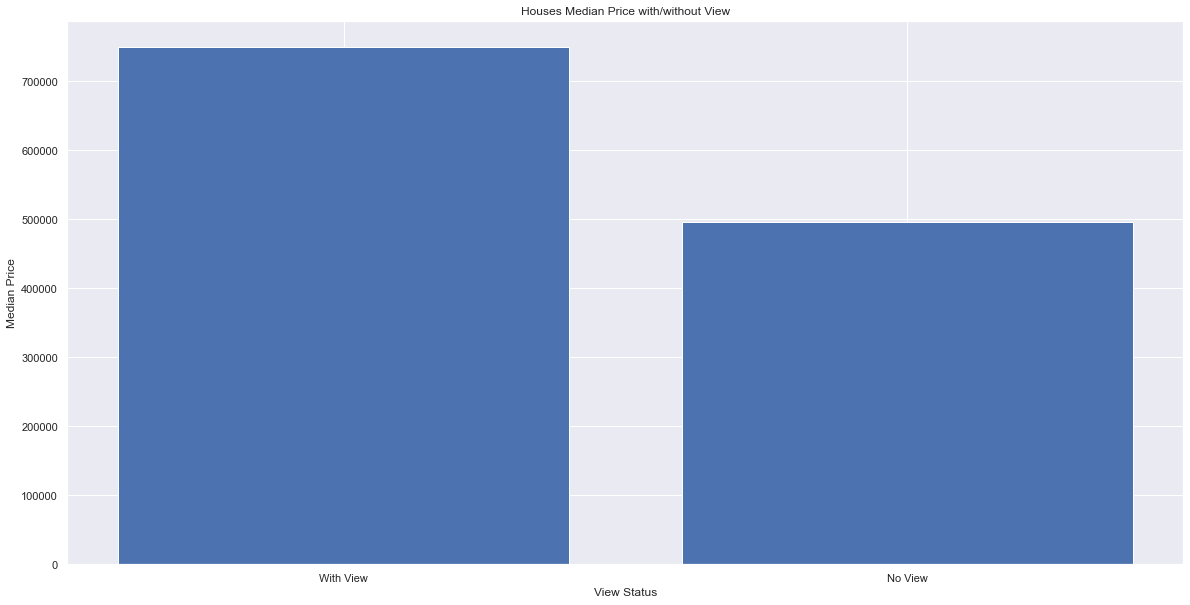

In [68]:
plt.xlabel("View Status")
plt.ylabel("Median Price")
plt.bar(view['View'], view['Median_Price'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Houses Median Price with/without View")
plt.show()

### 2.8 Condition of the house

In [32]:
house_raw['condition'].value_counts().to_frame()

,condition
3,14031
4,5679
5,1701
2,172
1,30


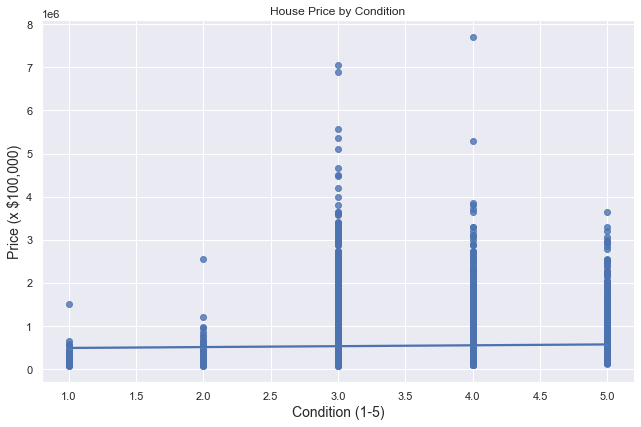

In [33]:
sns.lmplot(x ="condition", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Condition (1-5)', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('House Price by Condition')
plt.show()

### 2.9 Grade of the house

In [34]:
house_raw['grade'].value_counts().to_frame()

,grade
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29
13,13


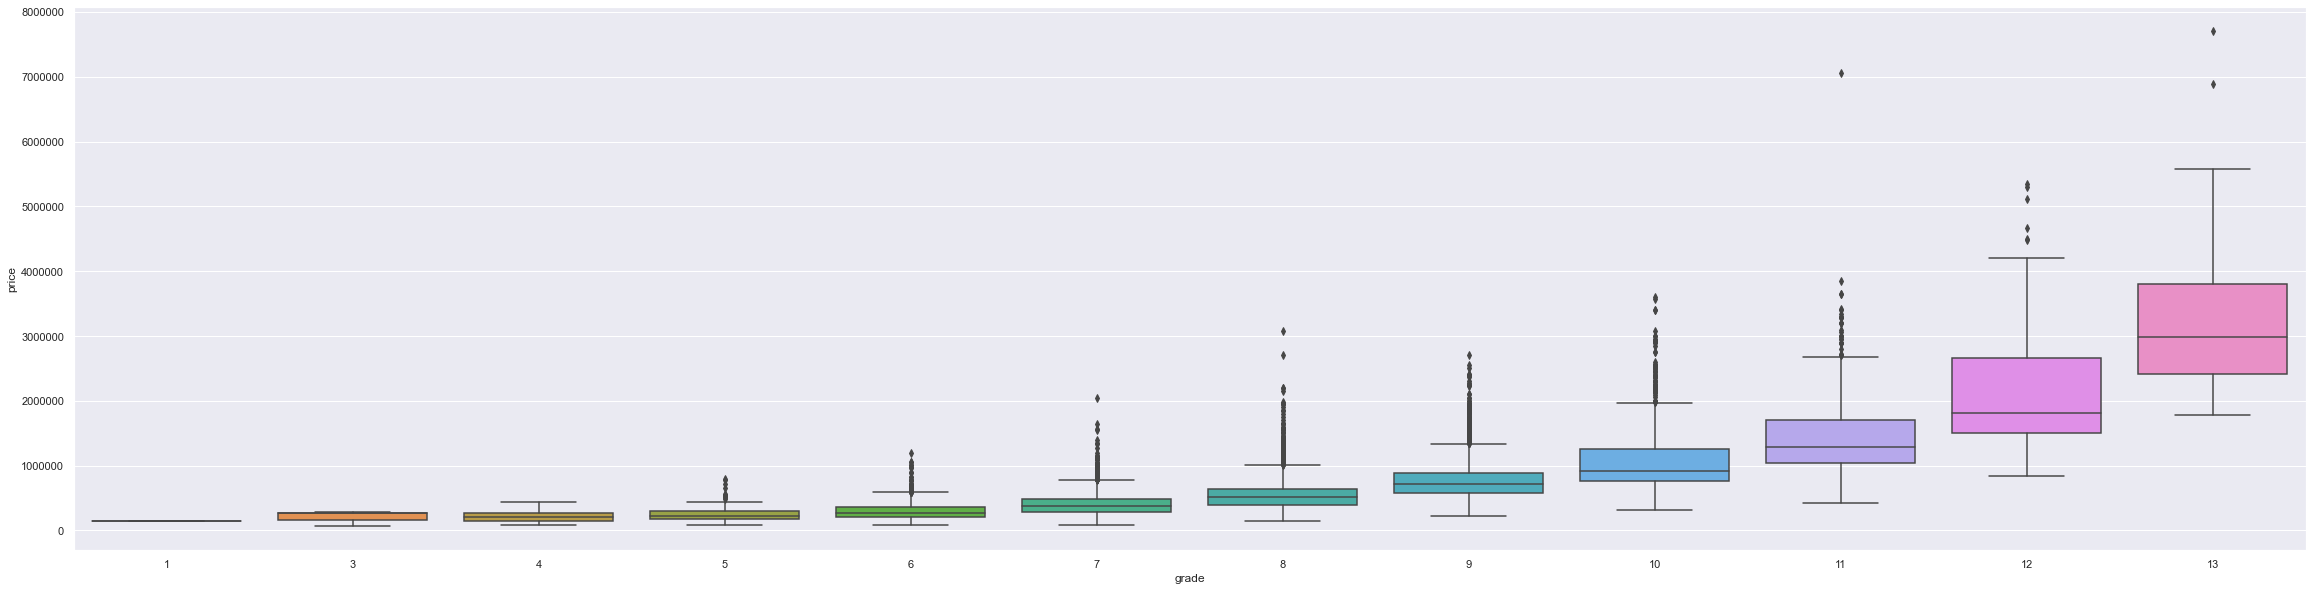

In [35]:
sns.boxplot(x = "grade", y = "price", data = house_raw)
plt.ticklabel_format(style = 'plain', axis = 'y')
sns.set(rc={'figure.figsize':(40,10)})

### 2.10 Year_built of the house

In [36]:
house_raw['yr_built'].value_counts().to_frame()

,yr_built
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27
1935,24


Text(0.5, 1.0, 'Median Price by Year Built')

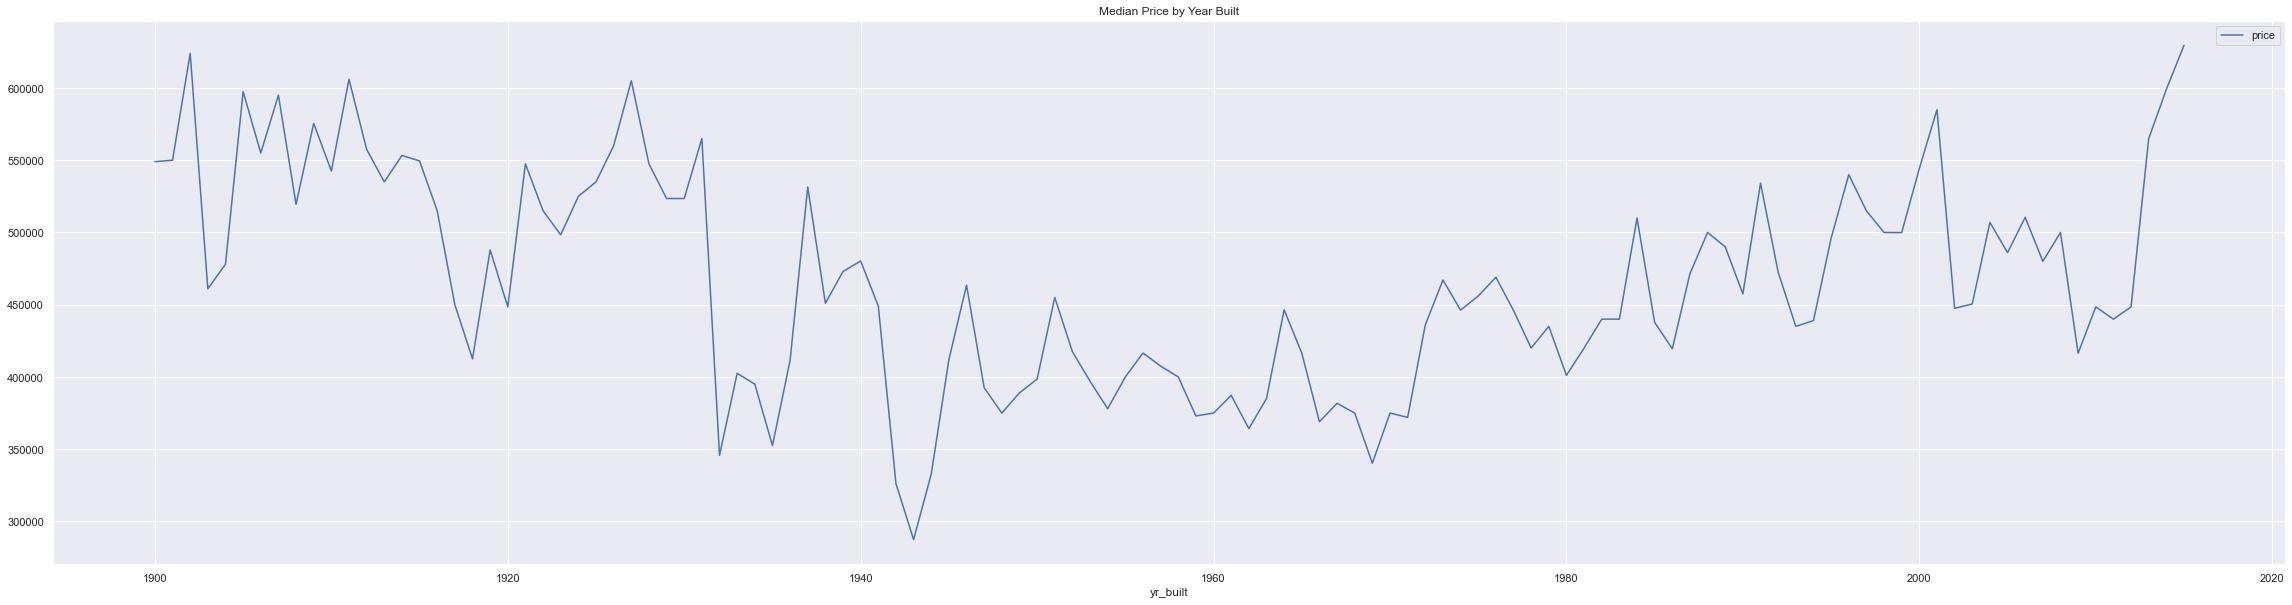

In [37]:
# Get the median price by the year and plot them:
price_year = house_raw[['yr_built','price'] ]
price_year
price_year.groupby(['yr_built'])['price'].median().plot(legend = True)
plt.title("Median Price by Year Built")

#### From the above  image, we can tell the year built and the house price are not positively correlated.

### 2.11 Renovation Status of the house

In [69]:
# One has previously been renovated, but the other has not.
new_reno = house_raw[house_raw['yr_renovated'] != 0]
no_reno = house_raw[house_raw['yr_renovated'] == 0]
new_reno_price_median = new_reno['price'].median()
print("Renovated house median price is ", new_reno_price_median,"$")
no_reno_price_median = no_reno['price'].median()
print("Non-renovated house median price is", no_reno_price_median,"$")

Renovated house median price is  600000.0 $
Non-renovated house median price is 448000.0 $


In [70]:
# Crate a dataframe:
data_reno = [new_reno_price_median, 'With Renovation'], [no_reno_price_median, 'No Removation']
# Create the pandas DataFrame
reno = pd.DataFrame(data_reno, columns=['Median_Price', 'Status'])
# print dataframe.
reno

,Median_Price,Status
0,600000.0,With Renovation
1,448000.0,No Removation


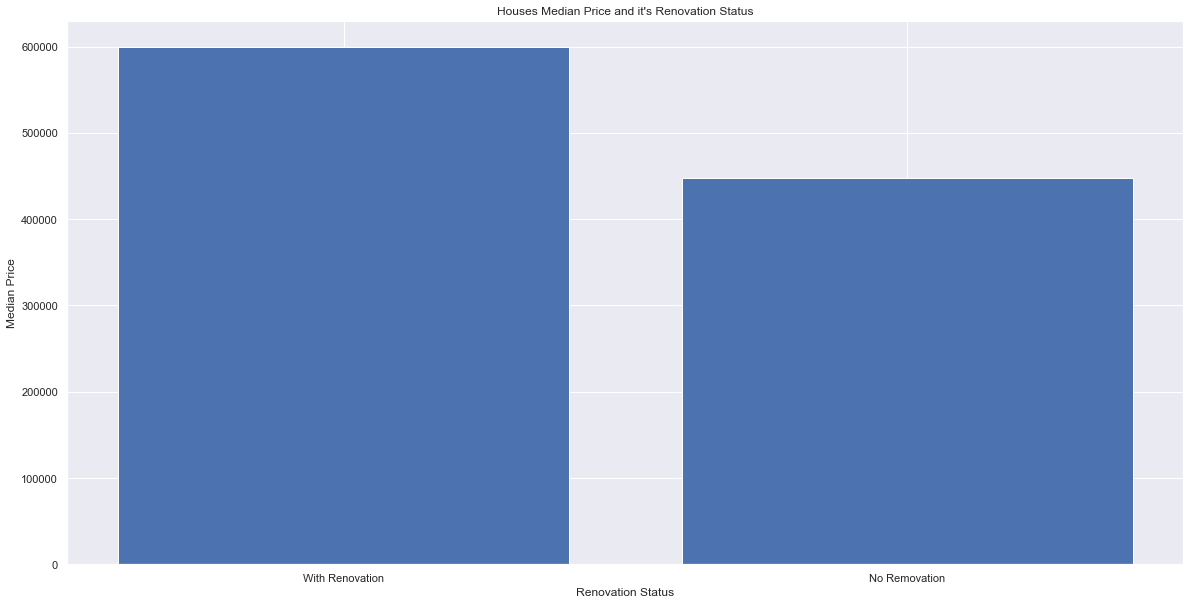

In [71]:
# Generate a bar plot to better show the price difference.
plt.xlabel("Renovation Status")
plt.ylabel("Median Price")
plt.bar(reno['Status'], reno['Median_Price'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Houses Median Price and it's Renovation Status")
plt.show()

### 2.12 Zip code and it's price:

In [41]:
zip_data = house_raw[['zipcode', 'price']]
zip_data

,zipcode,price
0,98178,221900.0
1,98125,538000.0
2,98028,180000.0
3,98136,604000.0
4,98074,510000.0
...,...,...
21608,98103,360000.0
21609,98146,400000.0
21610,98144,402101.0
21611,98027,400000.0


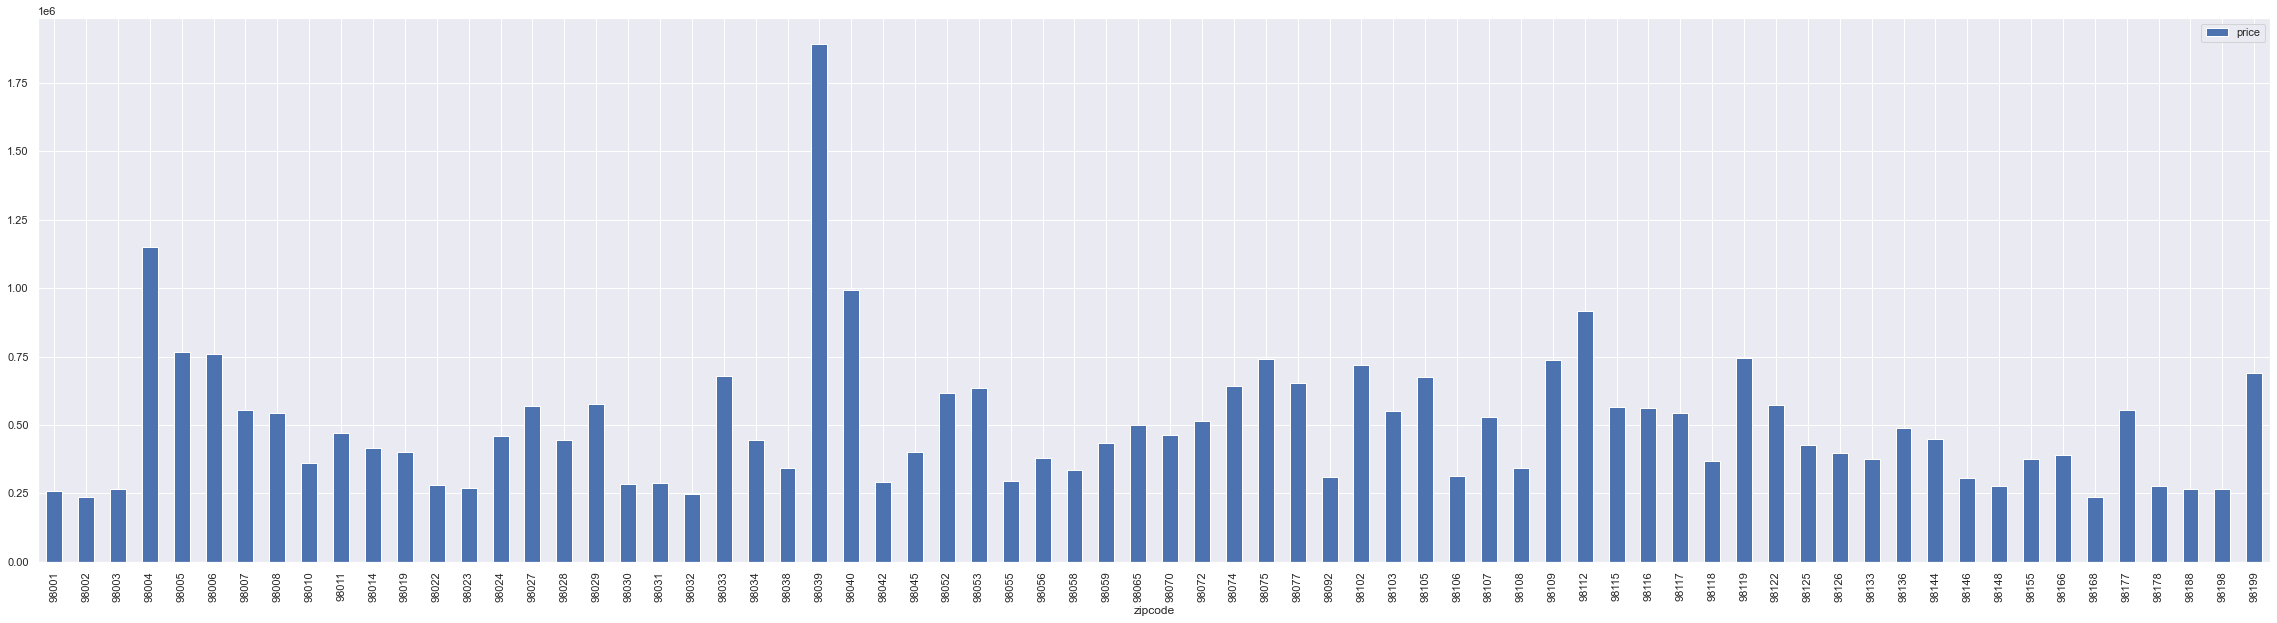

In [42]:
zip_data.groupby('zipcode')['price'].median().plot(kind = 'bar', legend = True )
plt.show()

### 2.13 House price and it's Geo location

In [43]:
map = house_raw[['price','lat', 'long'] ]
map.describe()

,price,lat,long
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,47.560053,-122.213896
std,3.671272e+05,0.138564,0.140828
min,7.500000e+04,47.155900,-122.519000
25%,3.219500e+05,47.471000,-122.328000
50%,4.500000e+05,47.571800,-122.230000
75%,6.450000e+05,47.678000,-122.125000
max,7.700000e+06,47.777600,-121.315000


In [44]:
# Remove the most extreme 1% prices,the most extreme .1% latitudes, & the most extreme .1% longitudes
map2 = map[(map['price'] >= np.percentile(map['price'], 0.5)) & 
 (map['price'] <= np.percentile(map['price'], 99.5)) & 
 (map['lat'] >= np.percentile(map['lat'], 0.05)) & 
 (map['lat'] < np.percentile(map['lat'], 99.95)) &
 (map['long'] >= np.percentile(map['long'], 0.05)) & 
 (map['long'] <= np.percentile(map['long'], 99.95))]
map2.describe()

,price,lat,long
count,2.135100e+04,21351.000000,21351.000000
mean,5.290363e+05,47.560417,-122.213852
std,3.074869e+05,0.138371,0.139595
min,1.340000e+05,47.184000,-122.505000
25%,3.248940e+05,47.471300,-122.328000
50%,4.500000e+05,47.571900,-122.229000
75%,6.400000e+05,47.678300,-122.124000
max,2.450000e+06,47.777000,-121.402000


In [45]:
# import street map
street_map = gpd.read_file('/Users/UE/Desktop/WA/tl_2016_53_cousub.shp')
# Generate geometry to contain the longtitude and latitude
gdf = gpd.GeoDataFrame( map2, geometry = gpd.points_from_xy( map2['long'], map2['lat']))
print(gdf.head())

      price      lat     long                     geometry
0  221900.0  47.5112 -122.257  POINT (-122.25700 47.51120)
1  538000.0  47.7210 -122.319  POINT (-122.31900 47.72100)
2  180000.0  47.7379 -122.233  POINT (-122.23300 47.73790)
3  604000.0  47.5208 -122.393  POINT (-122.39300 47.52080)
4  510000.0  47.6168 -122.045  POINT (-122.04500 47.61680)


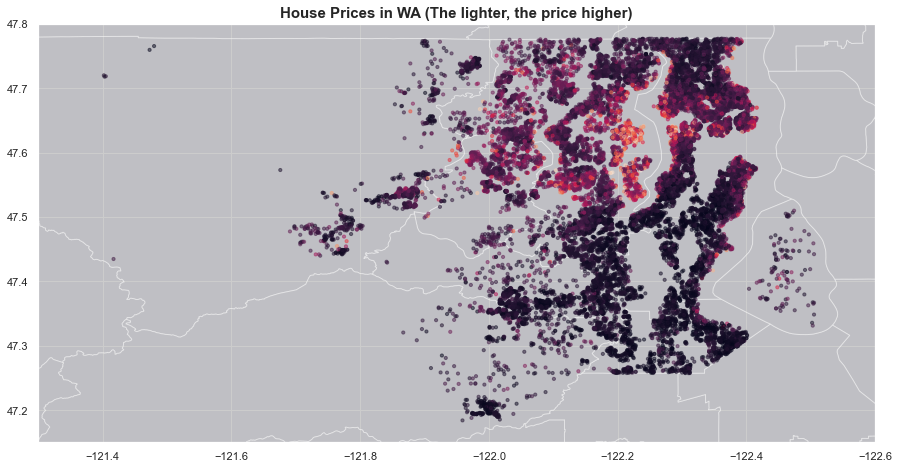

In [46]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axe
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
gdf.plot( column = 'price' , ax = ax , alpha= 0.5, legend = False, markersize = 10 )

# add title to graph
plt.title( 'House Prices in WA (The lighter, the price higher)', fontsize = 15,fontweight = 'bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-121.30 , -122.60)
plt.ylim( 47.15 , 47.80)
# show map
plt.show()

### 2.14 sqft_above, sqft_basement and the house price:

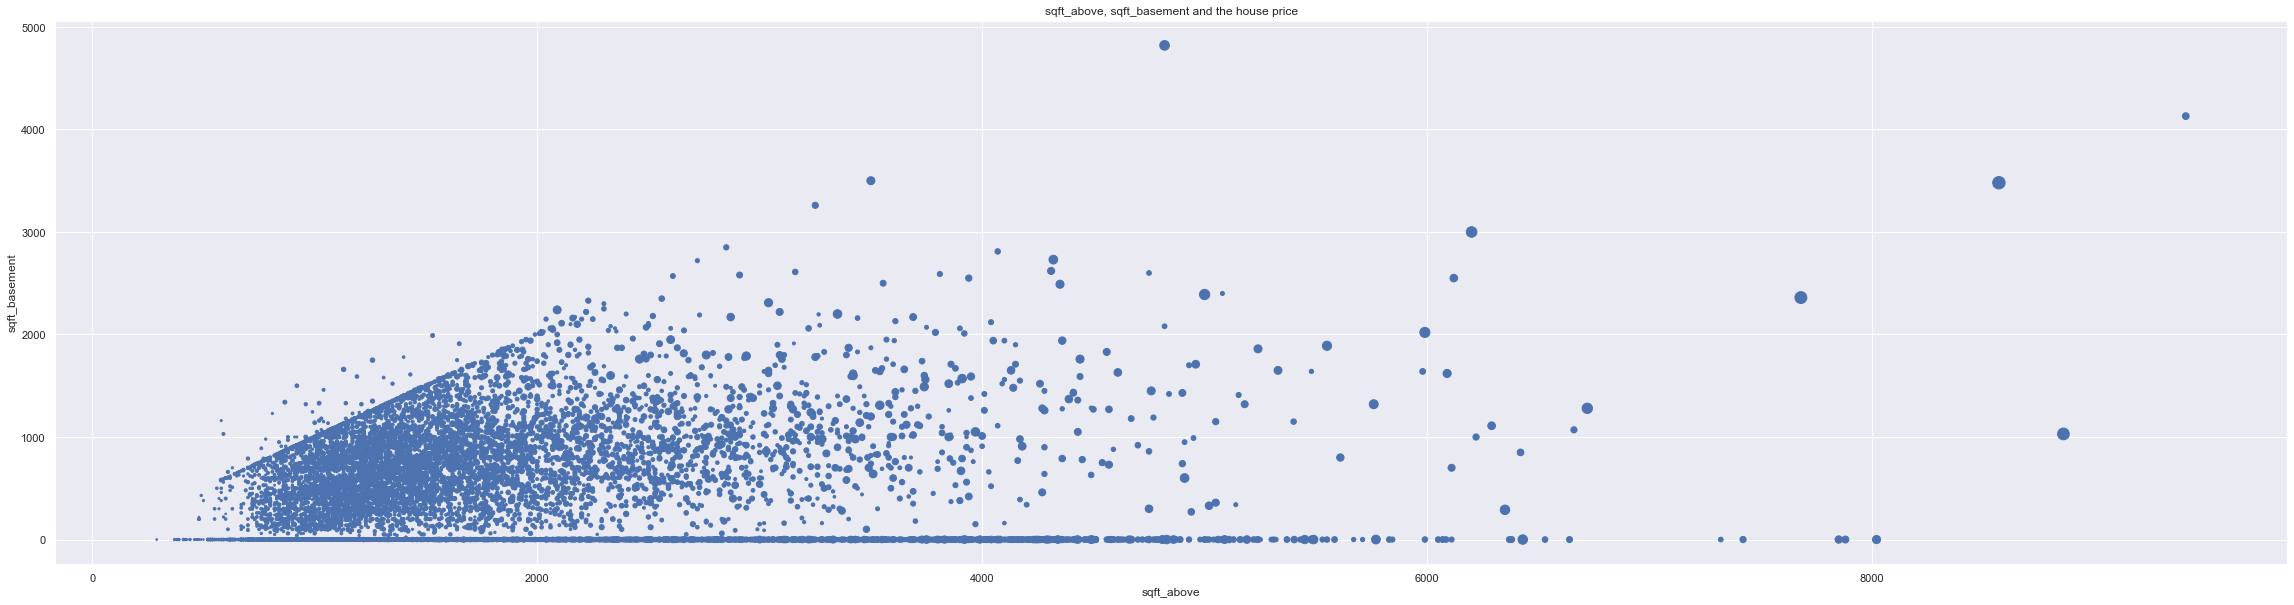

In [47]:
# Set sqft_above to x and sqft_basement to y. The bigger the dot, the higher the house price.
x = house_raw['sqft_above']
y = house_raw['sqft_basement']
size= house_raw['price']/50000
plt.xlabel("sqft_above")
plt.ylabel("sqft_basement")
plt.title("sqft_above, sqft_basement and the house price")
plt.scatter(x, y, s = size)

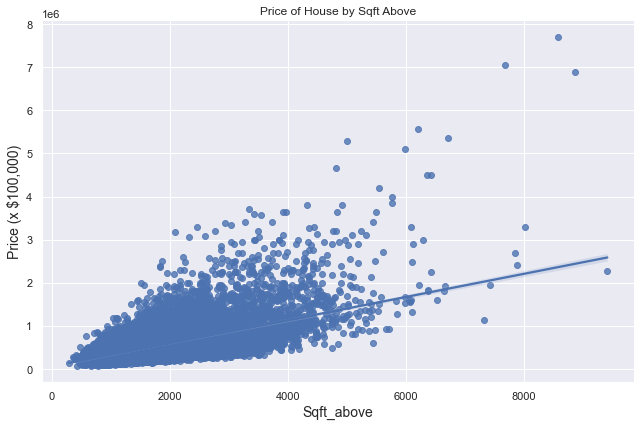

In [48]:
sns.lmplot(x ="sqft_above", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Sqft_above', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Above')
plt.show()

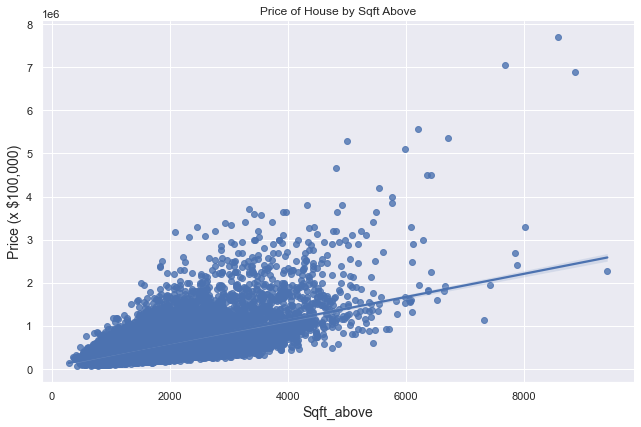

In [49]:
# house price and sqft_above:
sns.lmplot(x ="sqft_above", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Sqft_above', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Above')
plt.show()

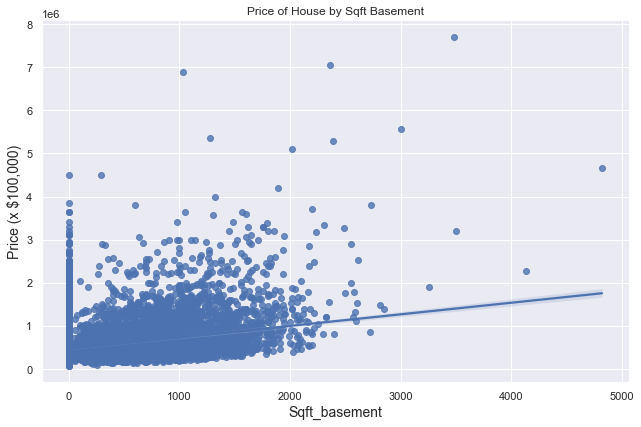

In [50]:
# house price and sqft_basement:
sns.lmplot(x ="sqft_basement", y ="price", data = house_raw,height=6, aspect=1.5)
plt.xlabel('Sqft_basement', fontsize=14)
plt.ylabel('Price (x $100,000)', fontsize=14)
plt.title('Price of House by Sqft Basement')
plt.show()

# Part 3: Random Forest Analysis

In [51]:
Var_List = [ "bedrooms", "bathrooms","sqft_living", "sqft_lot","floors","condition",
            "waterfront","view","condition","grade", "sqft_above", "sqft_basement",
            "yr_renovated", "lat", "long", "zipcode"]

In [52]:
X = house_raw[Var_List]
Y = house_raw['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [53]:
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (17290, 16)
y_test: (4323, 16)
y_train: 17290
y_test: 4323


In [54]:
regressor = RandomForestRegressor(n_estimators=250, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [55]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 88.19


Text(0, 0.5, 'Predicted')

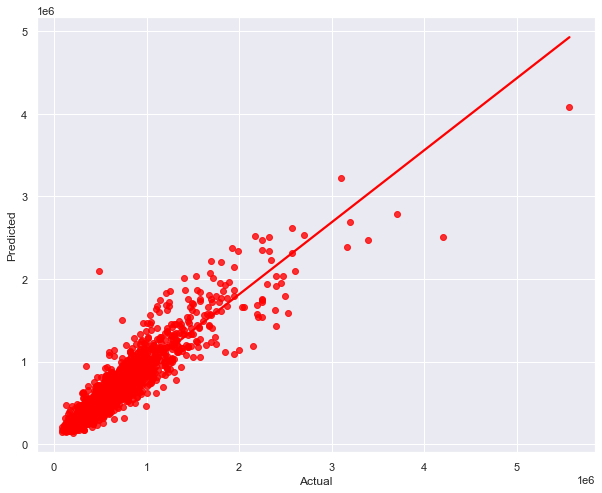

In [56]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

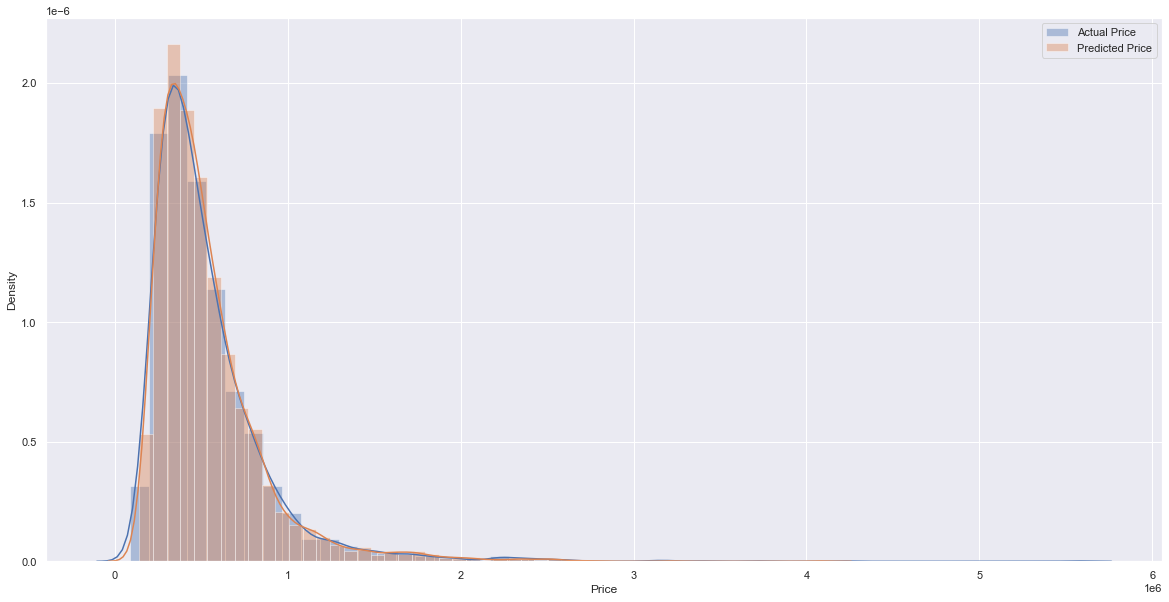

In [57]:
# Plot distribution of predictions
f, ax = plt.subplots(figsize=(20, 10)) 
sns.distplot(y_test, hist=True, label="Actual Price")
sns.distplot(y_pred, hist=True, label="Predicted Price")
plt.xlabel("Price")
plt.legend()
plt.show()